# Análise de Fases Espectrais em Supernovas de Tipo Ia
# Manipulação de Arquivos de Supernovas

### Aluno: Luis Ricardo Arantes Filho - Doutorando CAP INPE


A organização dos dados do acervo do CfA não é simples, pois muitas informações encontram-se organizadas de maneiras diferentes, como arquivos texto, tabelas em formato pdf e dados fits.

### Etapa de Tratamento de dados

### Organizando o ambiente e suas bibliotecas

#### NUMPY e PLOTS

In [4]:
import numpy as np
import matplotlib.pyplot as plt

#### Processamento de Sinais

In [5]:
import peakutils
from scipy.signal import savgol_filter
from scipy.interpolate import interp1d
from scipy.signal import argrelextrema
from scipy import interpolate

#### Manipulando DataFrames

In [6]:
import pandas as pd
import os
from collections import OrderedDict

### Rotina para abrir arquivos ASCII dos Espectros de Supernovas

In [7]:
##Construindo função para abrir os arquivos
    #RETORNA ARRAYS
def abreArquivos(caminho,nomeArquivo):
    arquivo = caminho + nomeArquivo
    fVar = open(arquivo, 'r')
    #ler o arquivo inteiro e guardar dentro de uma variavel que será uma lista para cada
    #linha do arquivo
    lines = fVar.readlines()
    fVar.close()
    #inicializa as variaveis para serem listas
    x1 = []
    y1 = []
    #ler as linhas do arquivo guardado em "linhas" e insere os valores em variaveis
    for line in lines:
        p = line.split()
        #x1.append(str(p[0]))
        #y1.append(str(p[1]))
        #x1.append(unicode((p[0])).encode("utf-8"))
        #y1.append(unicode((p[1])).encode("utf-8"))
        x1.append((p[0]))
        y1.append((p[1]))
        
    vetorX = np.array(x1)#angstrons
    vetorY = np.array(y1)#Flux
    return np.float64(vetorX),np.float64(vetorY)
#fim função

### Rotina para abrir arquivos ASCII dos Valores de Fase Espectral

In [8]:
##Construindo função para abrir os arquivos
    #RETORNA LISTA
def abreArquivosPhase(caminho,nomeArquivo):
    arquivo = caminho + nomeArquivo
    fVar = open(arquivo, 'r')
    lines = fVar.readlines()
    fVar.close()
    x1 = []
    y1 = []
   
    for line in lines:
        p = line.split(";")
        x1.append((p[0]))
        y1.append((p[1]))
        
    return x1,y1
#fim função

### Rotina para abrir arquivos dos Valores de Redshift

In [9]:
##Construindo função para abrir os arquivos no Calculo de Redshift
    #aqui os tipos são genericos
def abreArquivosRedShiftSN(caminho,nomeArquivo,tipo1,tipo2):
    arquivo = caminho + nomeArquivo
    fVar = open(arquivo, 'r')
    lines = fVar.readlines()
    fVar.close()
    x1 = []
    y1 = []
    for line in lines:
        p = line.split()
        x1.append(tipo1(p[0]))
        y1.append(tipo2(p[1]))   
    vetorX = np.array(x1)#NOME
    vetorY = np.array(y1)#Redshift
    
    return vetorX,vetorY
#fim função

#### EXEMPLOS PARA DEMONSTRAÇÃO

#### Supernova SN 1998dx - sem normalização

In [10]:
#definindo caminho default para demonstrações
caminho_def = 'notebooks_Data_Science/Dados_brutos/Supernova_Data/Cfa_1_47/'

#definindo arquivo de supernova default para demonstrações
sn_def = 'sn1998dx-19980914.flm'

2548
2548


Text(0.5,0,'Wavelength - [Angstrons]')

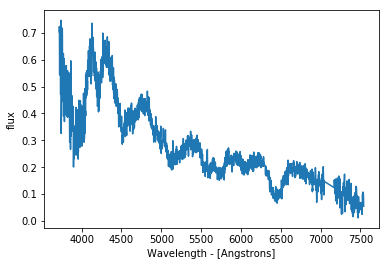

In [11]:
Sinalx, Sinaly = abreArquivos(caminho_def,sn_def)
print(len(Sinalx))
print(len(Sinaly))

plt.plot(Sinalx,Sinaly)
plt.ylabel('flux')
plt.xlabel('Wavelength - [Angstrons]')

## Processamento de Sinais

#### Normaliza os espectros valores de 0 ~ 1

In [12]:
#Normalizando o Fluxo
def normalFlux(fluxo):
    maxFlux = np.max(fluxo);
    minFlux = np.min(fluxo);
    
    return (fluxo - minFlux)/(maxFlux - minFlux);
#fim função

#### Interpola

In [13]:
##Interpolando os espectros
def interpola(vetorx, vetory,pontos):
  x = np.array(vetorx)
  y = np.array(vetory)
  
  xnew = np.linspace(np.min(x),np.max(x),pontos)
  
  ynew = interp1d(x,y,kind='linear')

  return xnew,ynew(xnew)

#### Filtragem

In [14]:
##Projeto para o Filtro Savitzky Golay
def savitzky_golay(vetorX,vetorY, ws,ordem,diff):
    x = np.array(vetorX)
    y = np.array(vetorY)
    window_size, poly_order = ws, ordem
    yy_sg = savgol_filter(y, window_size, poly_order,diff)
    
    return x,yy_sg
#fim função

#### Supernova SN 1998dx - Normalizada para a análise

Text(0.5,0,'Wavelength - [Angstrons]')

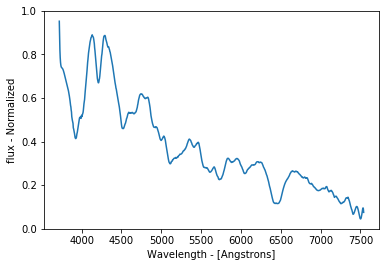

In [15]:
Sinalx,Sinaly = interpola(Sinalx,Sinaly,1000) #escolha o numero de pontos para interpolar
#normaliza o fluxo
Sinaly = normalFlux(Sinaly)
#Executa a Filtragem de dados
Sinal_filt_x,Sinal_filt_y = savitzky_golay(Sinalx, Sinaly,71,9,0)#x,y,window,ordem do polinomio
plt.plot(Sinal_filt_x,Sinal_filt_y)
plt.ylabel('flux - Normalized')
plt.xlabel('Wavelength - [Angstrons]')

O ajuste de redshift nos espectros é feito para avaliar as linhas de emissão e absorção(picos e vales) como se espectro estivesse em repouso. Este ajuste é feito para que as linhas espectrais de elementos de supernovas estejam ajustadas o mais próximo das linhas espectrais de elementos que são obtidas no laboratório. Em termos muito simples o desvio para o vermelho (também conhecido pelo termo inglês redshift) corresponde a uma alteração na forma como a frequência das ondas de luz é observada no espectroscópio em função da velocidade relativa entre a fonte emissora e o receptor observador.

Devido à invariância da velocidade da luz no vácuo e admitindo um emissor e um receptor em repouso relativo, um raio de luz é captado como uma cor padrão em função de sua frequência. Na descrição ondulatória, o período (inverso da frequência da luz) é definido pelo intervalo de tempo medido entre duas cristas consecutivas da onda. Quando o emissor e o observador estão em repouso relativo, ambos medem a mesma frequência.

Se o emissor (fonte de luz) se move na direção do receptor, o intervalo de tempo que o receptor mede entre duas cristas consecutivas será inferior ao medido pelo emissor, logo o receptor observa um desvio para a gama de cores de mais elevada frequência (desvio para o azul no espectro). Se o emissor (fonte) se afasta do receptor observador, o intervalo de tempo que este mede entre duas cristas consecutivas aumenta, observando um desvio para a gama de cores de mais baixa frequência (desvio para o vermelho no espectro).

O mesmo fenômeno ocorre quando o receptor se move em direção ou em fuga da fonte, pois o que importa é a velocidade relativa entre a fonte e o receptor.

O desvio para o vermelho pode ter três causas distintas: o Efeito Doppler descrito acima, o campo gravitacional da fonte (a luz perde energia ao subir no campo gravitacional da estrela) e a expansão do Universo ("redshift" cosmológico).

In [16]:
##Construindo Ajuste do RedShift ou do Deslocamento de Doppler
def ajusteRedShift (angstrons,zhel):
    angstrons = (angstrons)/(zhel+1)
    return angstrons    
#fim função

Text(0.5,0,'Wavelength - [Angstrons]')

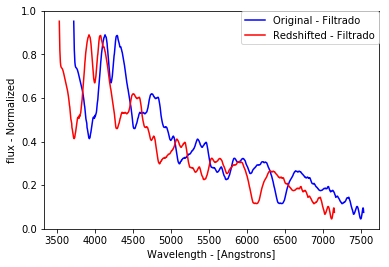

In [17]:
Sinal_x_redshifted = Sinal_filt_x
Sinal_y_redshifted = Sinal_filt_y

Sinal_x_redshifted = ajusteRedShift(Sinal_x_redshifted,0.0539)#valor real obtido para a SN 1998 dx

plt.plot(Sinal_filt_x,Sinal_filt_y,'b',label = 'Original - Filtrado')
plt.plot(Sinal_x_redshifted,Sinal_y_redshifted,'r',label = 'Redshifted - Filtrado')
plt.legend(loc=1, borderaxespad=0.)
plt.ylabel('flux - Normalized')
plt.xlabel('Wavelength - [Angstrons]')

## A nescessidade de encontrar corretamente os picos e vales do sinal

Encontrar corretamente os picos e vales de um sinal permite identificar corretamente as caracteristicas deste sinal em relação às intensidades e areas totais. Na espectroscopia estas caracteristicas permitem identificar corretamente quais elementos quimicos correspondem a determinados comprimentos de onda e qual é a intensidade e a abundancia deste elemento em um espectro. Em supernovas encontrar corretamente os elementos permite identificar caracteristicas unicas, como o tipo e as condições de formação do fenomeno. Supernovas Ia, por exemplo, possuem abundancia de Silicio e Enxofre neutros e uma vez ionizados.

### Encontrando os picos e vales do sinal

In [18]:
def findVP(x,y):
    # sort the data in x and use that to rearrange y
    sortId = np.argsort(x)
    x = x[sortId]
    y = y[sortId]

    # this way the x-axis corresponds to the index of x
    pico = 0    
    vale = 0
    
    pico = np.array(argrelextrema(y, np.greater))#Find Max local
    vale = np.array(argrelextrema(y, np.less))#Find Min local
   
    pico = pico.T
    vale = vale.T
      
    return pico,vale

In [19]:
picos,vales = findVP(Sinalx,Sinaly)
VetPicosx = Sinalx[picos] #Comprimento de Onda do pico
VetPicosy = Sinaly[picos] #Fluxo do pico
##Vetor de vales
VetValesx = Sinalx[vales] #Comprimento de Onda do Vale
VetValesy = Sinaly[vales] #Fluxo do vale

### Busca no sinal Orignial

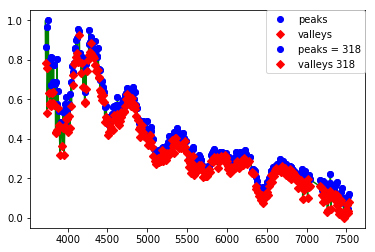

In [20]:
plt.plot(Sinalx,Sinaly,'g')
plt.plot(VetPicosx,VetPicosy,'bo',label = 'peaks',linewidth=0.1)
plt.plot(VetValesx,VetValesy,'rD',label = 'valleys',linewidth=0.1)
plt.plot(VetPicosx,VetPicosy,'bo',label = 'peaks = '+str(len(VetPicosx)),linewidth=0.1)
plt.plot(VetValesx,VetValesy,'rD',label = 'valleys '+str(len(VetPicosy)),linewidth=0.1)
plt.legend(loc=1, borderaxespad=0.)

### Busca no sinal Filtrado

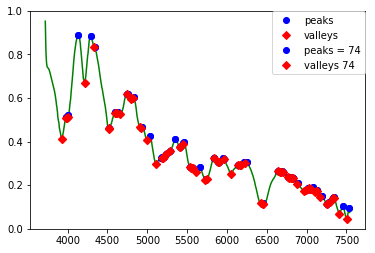

In [21]:
picos,vales = findVP(Sinal_filt_x,Sinal_filt_y)#sinal filtrado
VetPicosx = Sinal_filt_x[picos] #Comprimento de Onda do pico
VetPicosy = Sinal_filt_y[picos] #Fluxo do pico
##Vetor de vales
VetValesx = Sinal_filt_x[vales] #Comprimento de Onda do Vale
VetValesy = Sinal_filt_y[vales] #Fluxo do vale

plt.plot(Sinal_filt_x,Sinal_filt_y,'g')
plt.plot(VetPicosx,VetPicosy,'bo',label = 'peaks',linewidth=0.1)
plt.plot(VetValesx,VetValesy,'rD',label = 'valleys',linewidth=0.1)
plt.plot(VetPicosx,VetPicosy,'bo',label = 'peaks = '+str(len(VetPicosx)),linewidth=0.1)
plt.plot(VetValesx,VetValesy,'rD',label = 'valleys '+str(len(VetPicosy)),linewidth=0.1)
plt.legend(loc=1, borderaxespad=0.0)


Apesar da grande redução de ruido o sinal ainda apresenta inconsistencias, sendo então dificil encontrar os limites corretos entre cada pico e cada vale do sinal. Desta maneira é executado um metodo de otimização Dupla Filtragem proposto em [5], para encontrar corretamente cada pico e vale de um sinal de supernova. Foram testadas outras estratégias na literatura, denominadas aqui como: estratégia Shappee [6], estratégia Howell [7], estratégia Haruty_A e Haruty_B [8]. Estas estratégias foram utilizadas para trabalhar com supernovas de maneira mais otimizada.

In [22]:
def dupla_filtragem(Sinalx,Sinaly):
    Sinalx,Sinaly = interpola(Sinalx,Sinaly,1000) #escolha o numero de pontos para interpolar
    #normaliza o fluxo
    Sinaly = normalFlux(Sinaly)
    #Executa a Filtragem de dados
    Sinal_filt_x,Sinal_filt_y = savitzky_golay(Sinalx, Sinaly,71,9,0)#x,y,window,ordem do polinomio
    Sinal_duplo_x,Sinal_duplo_y = savitzky_golay(Sinal_filt_x, Sinal_filt_y,71,9,0)#x,y,window,ordem do polinomio
    
    return Sinal_duplo_x,Sinal_duplo_y


In [23]:
def shappee(Sinalx,Sinaly):
    #Executa a Filtragem de dados
    Sinal_filt_x,Sinal_filt_y = savitzky_golay(Sinalx, Sinaly,61,2,0)#x,y,window,ordem do polinomio
    return Sinal_filt_x,Sinal_filt_y

#moving average box por convolução
def Howell(y):
    box_pts = 65
    box = np.ones(box_pts)/box_pts
    y_smooth = np.convolve(y, box, mode='same')
    return y_smooth

def haruty_A(y):
    box_pts = 70
    box = np.ones(box_pts)/box_pts
    y_smooth = np.convolve(y, box, mode='same')
    return y_smooth

def haruty_B(y):
    box_pts = 10
    box = np.ones(box_pts)/box_pts
    y_smooth = np.convolve(y, box, mode='same')
    return y_smooth


### Eficiencia do Sinal Duplamente Filtrado

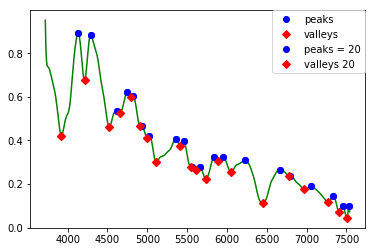

In [24]:
Sinal_duplo_x,Sinal_duplo_y = dupla_filtragem(Sinalx,Sinaly)
picos,vales = findVP(Sinal_duplo_x,Sinal_duplo_y)#sinal duplamente filtrado

VetPicosx = Sinal_duplo_x[picos] #Comprimento de Onda do pico
VetPicosy = Sinal_duplo_y[picos] #Fluxo do pico
##Vetor de vales
VetValesx = Sinal_duplo_x[vales] #Comprimento de Onda do Vale
VetValesy = Sinal_duplo_y[vales] #Fluxo do vale

plt.plot(Sinal_duplo_x,Sinal_duplo_y,'g')
plt.plot(VetPicosx,VetPicosy,'bo',label = 'peaks',linewidth=0.1)
plt.plot(VetValesx,VetValesy,'rD',label = 'valleys',linewidth=0.1)
plt.plot(VetPicosx,VetPicosy,'bo',label = 'peaks = '+str(len(VetPicosx)),linewidth=0.1)
plt.plot(VetValesx,VetValesy,'rD',label = 'valleys '+str(len(VetPicosy)),linewidth=0.1)
plt.legend(loc=1, borderaxespad=0.0)
plt.show()

Current size: [6.0, 4.0]


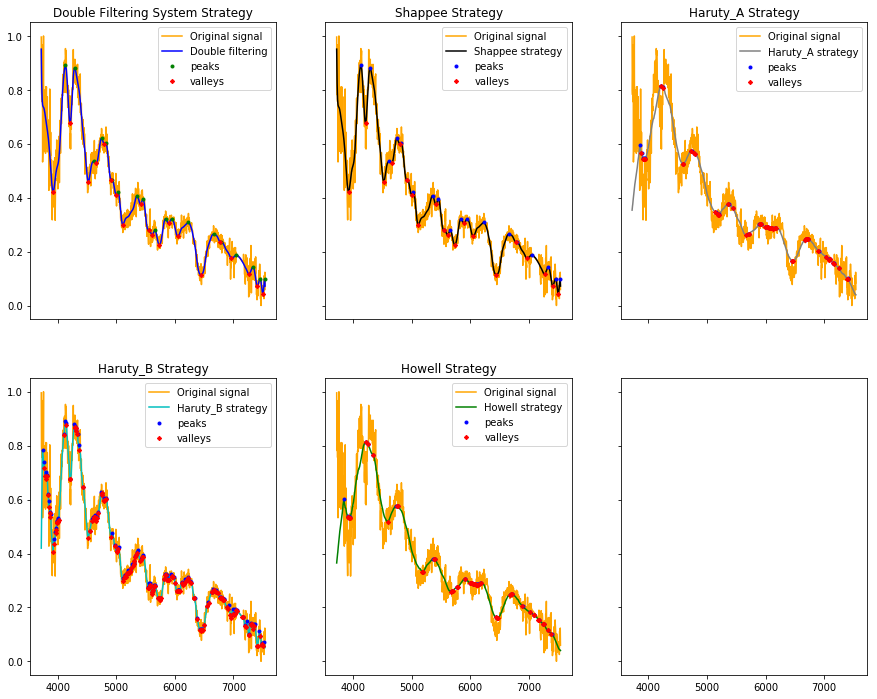

In [25]:
Sinal_duplo_x,Sinal_duplo_y = dupla_filtragem(Sinalx,Sinaly)
shappee_x,shappee_y = dupla_filtragem(Sinalx,Sinaly)

howell = Howell(Sinaly)
haruty_a = haruty_A(Sinaly) 
haruty_b = haruty_B(Sinaly)


# Get current size
fig_size = plt.rcParams["figure.figsize"]
 
# Prints: [8.0, 6.0]
print ("Current size:", fig_size)
 
# Set figure width to 12 and height to 9
fig_size[0] = 15
fig_size[1] = 12
plt.rcParams["figure.figsize"] = fig_size

fig, axs = plt.subplots(nrows=2, ncols=3, sharex=True, sharey=True)
axs[0,0].plot(Sinalx,Sinaly,'orange',label = 'Original signal')
axs[0,1].plot(Sinalx,Sinaly,'orange',label = 'Original signal')
axs[0,2].plot(Sinalx,Sinaly,'orange',label = 'Original signal')
axs[1,0].plot(Sinalx,Sinaly,'orange',label = 'Original signal')
axs[1,1].plot(Sinalx,Sinaly,'orange',label = 'Original signal')

axs[0,0].plot(Sinal_duplo_x,Sinal_duplo_y,'b', label = 'Double filtering',)
picos,vales = findVP(Sinal_duplo_x,Sinal_duplo_y)
VetPicosx = Sinal_duplo_x[picos] #Comprimento de Onda do pico
VetPicosy = Sinal_duplo_y[picos] #Fluxo do pico
##Vetor de vales
VetValesx = Sinal_duplo_x[vales] #Comprimento de Onda do Vale
VetValesy = Sinal_duplo_y[vales] #Fluxo do vale
axs[0,0].plot(VetPicosx,VetPicosy,'go',label = 'peaks',linewidth=0.1,markersize=3.0)
axs[0,0].plot(VetValesx,VetValesy,'rD',label = 'valleys',linewidth=0.1,markersize=3.0)

#shappee
axs[0,1].plot(shappee_x,shappee_y,'k',label = 'Shappee strategy')
picos,vales = findVP(shappee_x,shappee_y)
VetPicosx = shappee_x[picos] #Comprimento de Onda do pico
VetPicosy = shappee_y[picos] #Fluxo do pico
##Vetor de vales
VetValesx = shappee_x[vales] #Comprimento de Onda do Vale
VetValesy = shappee_y[vales] #Fluxo do vale
axs[0,1].plot(VetPicosx,VetPicosy,'bo',label = 'peaks',linewidth=0.1,markersize=3.0)
axs[0,1].plot(VetValesx,VetValesy,'rD',label = 'valleys',linewidth=0.1,markersize=3.0)

#haruty_a
axs[0,2].plot(Sinalx,haruty_a,'gray', label = 'Haruty_A strategy')
picos,vales = findVP(Sinalx,haruty_a)
VetPicosx = Sinalx[picos] #Comprimento de Onda do pico
VetPicosy = haruty_a[picos] #Fluxo do pico
##Vetor de vales
VetValesx = Sinalx[vales] #Comprimento de Onda do Vale
VetValesy = haruty_a[vales] #Fluxo do vale
axs[0,2].plot(VetPicosx,VetPicosy,'bo',label = 'peaks',linewidth=0.1,markersize=3.0)
axs[0,2].plot(VetValesx,VetValesy,'rD',label = 'valleys',linewidth=0.1,markersize=3.0)

#haruty_b
axs[1,0].plot(Sinalx,haruty_b,'c', label = 'Haruty_B strategy')
picos,vales = findVP(Sinalx,haruty_b)
VetPicosx = Sinalx[picos] #Comprimento de Onda do pico
VetPicosy = haruty_b[picos] #Fluxo do pico
##Vetor de vales
VetValesx = Sinalx[vales] #Comprimento de Onda do Vale
VetValesy = haruty_b[vales] #Fluxo do vale
axs[1,0].plot(VetPicosx,VetPicosy,'bo',label = 'peaks',linewidth=0.1,markersize=3.0)
axs[1,0].plot(VetValesx,VetValesy,'rD',label = 'valleys',linewidth=0.1,markersize=3.0)

#Howell
axs[1,1].plot(Sinalx,howell,'g', label = 'Howell strategy')
picos,vales = findVP(Sinalx,howell)
VetPicosx = Sinalx[picos] #Comprimento de Onda do pico
VetPicosy = howell[picos] #Fluxo do pico
##Vetor de vales
VetValesx = Sinalx[vales] #Comprimento de Onda do Vale
VetValesy = howell[vales] #Fluxo do vale
axs[1,1].plot(VetPicosx,VetPicosy,'bo',label = 'peaks',linewidth=0.1,markersize=3.0)
axs[1,1].plot(VetValesx,VetValesy,'rD',label = 'valleys',linewidth=0.1,markersize=3.0)



axs[0,0].set_title('Double Filtering System Strategy')
axs[0,1].set_title('Shappee Strategy')
axs[0,2].set_title('Haruty_A Strategy')
axs[1,0].set_title('Haruty_B Strategy')
axs[1,1].set_title('Howell Strategy')

axs[0,0].legend()
axs[0,1].legend()
axs[0,2].legend()
axs[1,0].legend()
axs[1,1].legend()

### Calculando as larguras equivalentes e as intensidades de cada pico e vale

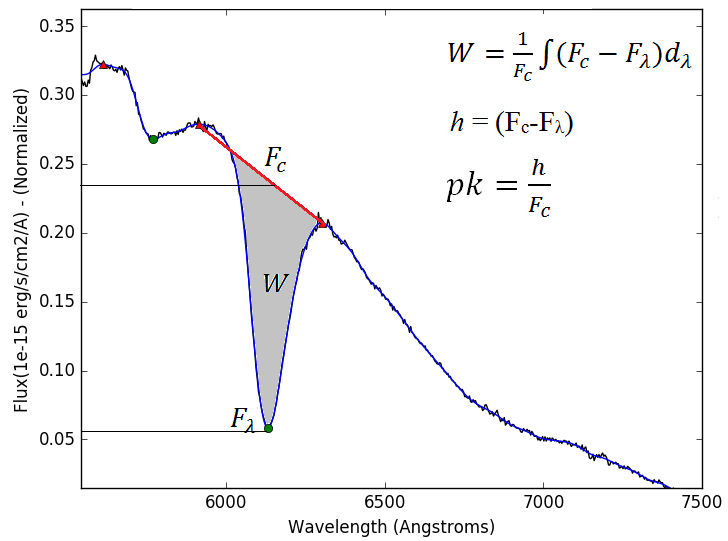

In [26]:
'''
<img src="notebooks_Data_Science\img\calculo_wlpk.png" width="600" height="600" align="center"/>
'''
Image(filename="notebooks_Data_Science\img\calculo_wlpk.png",width = 600,height = 600)

O parâmetro de Largura Equivalente define o quanto uma linha espectral, possui de área total. Este aspecto das linhas espectrais é um indicador tanto de perfil de linha como de força da linha espectral. A força de uma linha espectral é definida como forte absorção ou forte emissão de determinados elementos, isto é relacionado à abundância equivalente para cada elemento. o parâmetro de intensidade de pico é importante para definir a intensidade da linha espectral, de forma a dizer se uma linha, seja ela de absorção ou de emissão, possui intensidade fraca, mediana, ou forte.

### Rotina para análise de limites

In [27]:
##Construindo Função de analise de limites
def analisaLimites(SNx,SNy,vetorValesx,vetorPicosx,vetorValesy,vetorPicosy):#Comprimento de onda
    valesI = False
    valesT = False
    picosI = False
    picosT = False    
   
    # 1 condição   
    if vetorValesx[0] < vetorPicosx[0]:
        valesI = True
        #print("Começa com Vales")
    elif vetorValesx[0] > vetorPicosx[0]:
        picosI = True
        #print("Começa com Picos")
    #2 Condição
    if vetorValesx[len(vetorValesx)-1] < vetorPicosx[len(vetorPicosx)-1]:
        picosT = True        
        #print("Termina em Pico")
    elif vetorValesx[len(vetorValesx)-1] > vetorPicosx[len(vetorPicosx)-1]:
        valesT = True        
        #print("Termina em Vale")       
    limites = []
    
    
    #Vale - Vale
    if valesI == True and valesT == True:
       NewVetorPicosx = []
       NewVetorPicosy = []
       tmp = SNx[0]
       tmp2 = SNy[0]
       limites.append(float(tmp))
       #print "1º Var limite", limites
       for i in range (0,len(vetorPicosx)):
               #print i
               limites.append(float(vetorPicosx[i])) 
       tam = len(SNx)
       limites.append(float(SNx[tam-1]))
       NewVetorPicosx.append(float(tmp))
       NewVetorPicosy.append(float(tmp2))
       for i in range (0,len(vetorPicosx)):       
               NewVetorPicosx.append(float(vetorPicosx[i]))
               NewVetorPicosy.append(float(vetorPicosy[i]))
       
       NewVetorPicosx.append(float(SNx[len(SNx)-1]))
       NewVetorPicosy.append(float(SNy[len(SNy)-1]))       
       vetorPicosx =  NewVetorPicosx
       vetorPicosy =  NewVetorPicosy 
       #print limites    
    ## Fim instrução    
    
    #Vale - Pico
    
    if valesI == True and picosT == True:
       NewVetorPicosx = []
       NewVetorPicosy = []
       tmp = SNx[0]
       tmp2 = SNy[0]
       limites.append(float(tmp))
       #print "1º Var limite", limites
       for i in range (0,len(vetorPicosx)):
               #print i
               limites.append(float(vetorPicosx[i]))    
       NewVetorPicosx.append(float(tmp))
       NewVetorPicosy.append(float(tmp2))
       for i in range (0,len(vetorPicosx)):       
               NewVetorPicosx.append(float(vetorPicosx[i]))
               NewVetorPicosy.append(float(vetorPicosy[i]))
       vetorPicosx =  NewVetorPicosx
       vetorPicosy =  NewVetorPicosy    
       #print limites    
    ##fim Instrução
    
    #Pico - Vale
    if picosI == True and valesT == True:
       NewVetorPicosx = []
       NewVetorPicosy = []
       tmp = SNx[len(SNx) -1]
       tmp2 = SNy[len(SNx) -1]
       for i in range (0,len(vetorPicosx)):
               #print i
               limites.append(float(vetorPicosx[i])) 
       tam = len(vetorValesx)
       limites.append(float(SNx[tam-1])) 
       for i in range (0,len(vetorPicosx)):       
               NewVetorPicosx.append(float(vetorPicosx[i]))
               NewVetorPicosy.append(float(vetorPicosy[i]))
       
       NewVetorPicosx.append(float(SNx[len(SNx)-1]))
       NewVetorPicosy.append(float(SNy[len(SNy)-1]))       
       vetorPicosx =  NewVetorPicosx
       vetorPicosy =  NewVetorPicosy        
       
       #print limites
    #fim Instrução

   #Pico - Pico
    if picosI == True and picosT == True:
       for i in range (0,len(vetorPicosx)):
               #print i
               limites.append(float(vetorPicosx[i]))            
       #print limites 
    ##fim Instrução
    
    #Instrução de segurança
    tam1 = len(vetorValesx)
    tam2 = len(vetorPicosx)
    if (tam1 >= tam2):
       limites.append(float(SNx[len(SNx)-1]))
       limites.append(float(SNx[len(SNx)-1]))
       limites.append(float(SNx[len(SNx)-1]))
       limites.append(float(SNx[len(SNx)-1]))
       limites.append(float(SNx[len(SNx)-1]))
       limites.append(float(SNx[len(SNx)-1]))        

    return limites, vetorValesx,vetorPicosx,vetorValesy,vetorPicosy

### Largura Equivalente

In [28]:
##Construindo função de caracteristica -- Largura Equivalente - Wlambda
def calculoLarguraEqlv(Ic,ILambda,limites,vales):
    l1 = []
    l2 = []
    #para l1
    for i in range(0,(len(limites)-1)):
        l1.append(float(limites[i]))
    #fim da instrução
    
    #para l2    
    for i in range(1,len(limites)):
        l2.append(float(limites[i]))
    #fim da instrução
    
   #Largura Equilavente
    Wlambda = []    
    #formaDerivada = ((Ic - ILambda) * (l2 - l1))/Ic
    #I = integrate.quad(integrando, l1[i], l2[i], args=(Ic,ILambda))
    for i in range (0,len(vales)):    
        I = ((Ic[i] - ILambda[i]) * (l2[i] - l1[i]))/Ic[i]
        Wlambda.append(float(I))
    ##fim instrução
    
    return Wlambda      

### Intensidade

In [29]:
##Construindo função de caracteristica -- Pico de Intensidade
def peakIntensity(fluxLambda,fluxC):
    fluxLambda = fluxC - fluxLambda
    P = fluxLambda / fluxC
    return P

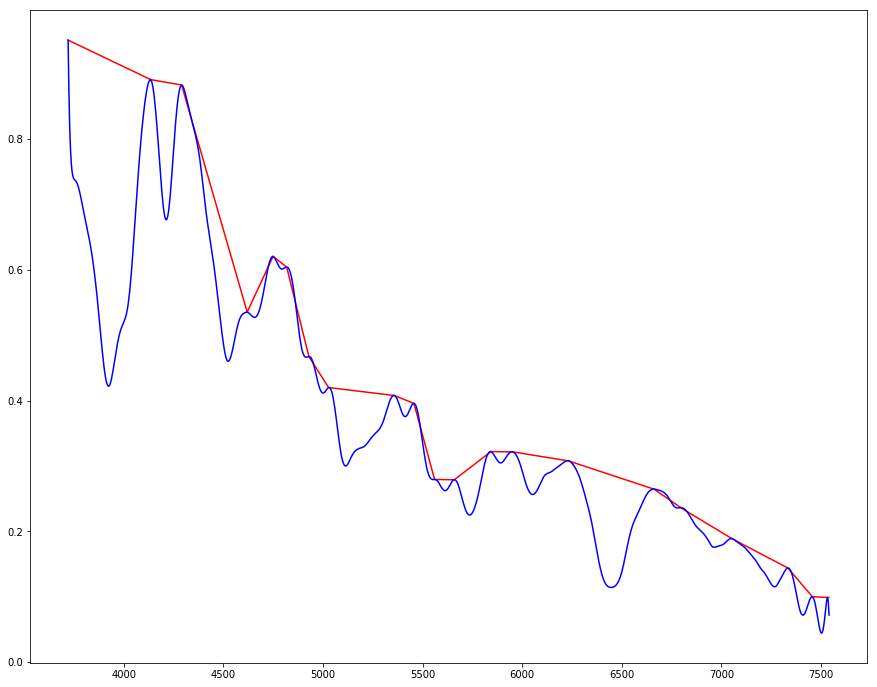

In [30]:
picos,vales = findVP(Sinal_duplo_x,Sinal_duplo_y)
#Vetor de Picos
VetPicosx = Sinal_duplo_x[picos] #Comprimento de Onda do Pico
VetPicosy = Sinal_duplo_y[picos] #Fluxo do pico

##Vetor de vales
VetValesx = Sinal_duplo_x[vales] #Comprimento de Onda do Vale
VetValesy = Sinal_duplo_y[vales] #Fluxo do vale

##Calculo de Largura Equivalente e Peak Intensity
#Limites
##Encontrando o continuum por metodos de interpolação, interpolação linear
limitesSN,vetorValesx,vetorPicosx,vetorValesy,vetorPicosy = analisaLimites(Sinal_duplo_x,Sinal_duplo_y,VetValesx,VetPicosx,VetValesy,VetPicosy)            
#calculo de continuum
tck = interpolate.splrep(vetorPicosx, vetorPicosy, k=1)
xnew = np.arange(Sinal_duplo_x[0],Sinal_duplo_x[len(Sinal_duplo_x) - 1],1)
ynew = interpolate.splev(xnew, tck, der=0)
plt.plot(xnew,ynew,'r')
plt.plot(Sinal_duplo_x,Sinal_duplo_y,'b')

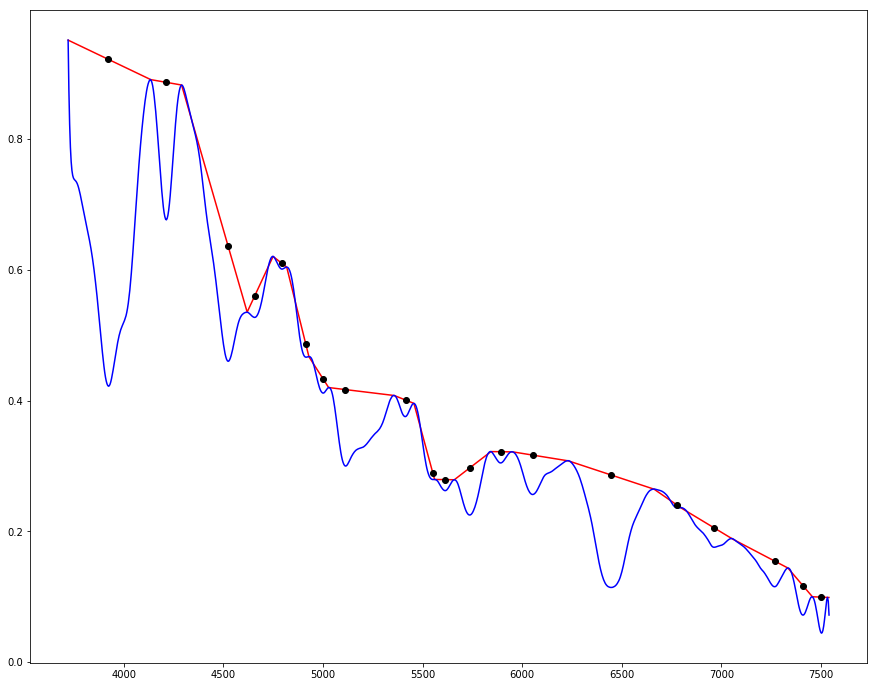

In [31]:
#Comprimento de onda já estabelecido para os vales
##encontrando fluxo dos vales
l = vetorValesx.ravel()
k = vetorValesy.ravel()
lista = list(l)
novaLista = [int(i) for i in lista]

Nxnew = list(xnew)
Nxnew = [int(i) for i in Nxnew]

elemento = []
for i in range (0,len(novaLista)):
    elemento.append(novaLista[i])

indices = []
for i in range (0,len(novaLista)):
    indices.append(Nxnew.index(elemento[i]))


##Calculo de Largura Equivalente
#Fluxos
Ilambda = k#lambda
Ic_InterCub = ynew[indices]

WLambda = calculoLarguraEqlv(Ic_InterCub,Ilambda,limitesSN,vetorValesx)
pk = peakIntensity(Ilambda,Ic_InterCub)

plt.plot(xnew,ynew,'r')
plt.plot(Sinal_duplo_x,Sinal_duplo_y,'b')
plt.plot(vetorValesx,Ic_InterCub,'ko')

#### Valores para as larguras de cada vale

In [32]:
print(WLambda)

[223.94175439017405, 37.1854308475505, 91.07912956512651, 7.5237813913410685, 0.9768399856401213, 4.569637123181415, 4.9095655187712275, 92.28255045131198, 6.280725055330289, 3.469571040752556, 6.008030771859874, 44.38299988469792, 5.716354897496934, 53.189767866207035, 259.70900211450817, 2.2211147452071214, 37.0264211510282, 71.58818776343875, 46.93501008824547, 42.36368710507519]


#### Valores para as Intensidades de cada vale

In [33]:
print(pk)

[0.54219637 0.23715607 0.27692726 0.05786321 0.01419045 0.04120302
 0.0493759  0.28058627 0.06316576 0.03360139 0.06042325 0.24178018
 0.05338343 0.19052436 0.60097145 0.01659389 0.14450478 0.25296179
 0.38352371 0.55387153]


# MANIPULAÇÃO GERAL DA BASE DE DADOS PARA DATAFRAMES

Neste trabalho todas as informações das bases de dados do acervo Cfa foram transformadas no formato de Data Frames da linguagem Python para a melhor manipulação das informações. As informações do DataFrame gerado contém:

•	Nome da Supernova {Ex: SN_1994D_19940205};

•	Os valores de fluxo e de comprimento de onda;

•	Tipo {Ex: Ia,Ib,Ic, II};

•	Fase Espectral {Ex: +2.5 dias};

•	Valor do Redshift da galáxia hospedeira;

•	Tag_Fase {Ex: Inicial, Pre_Maximo, Maximo, Pos_Maximo, Pre_Nebular, Nebular};

•	Localização de todos os picos e vales da supernova (linhas de emissão e absorção);

•	Larguras Equivalentes de cada pico e vale na supernova;

•	Intensidade de cada um dos picos e vales;


#### Calcula o Redshift para todas as supernovas

In [34]:
def gera_SN_Redshifted(caminhoEntrada,caminhoSaida,caminhoRedShift,nomeArquivo):    
    path = caminhoEntrada
    data = []
    nomeArquivo,redshift = abreArquivosRedShiftSN(caminhoRedShift,nomeArquivo,str,float)
    for j in range (0,len(redshift)):    
        for i in os.listdir(path):
            if os.path.isfile(os.path.join(path,i)) and nomeArquivo[j] in i:
                x,y = abreArquivosRedShiftSN(path,i,float,float)
                x = ajusteRedShift(x,redshift[j])
                data.append(redshift[j])
                #data.append((i + " " + str(redshift[j])))
                #print("Nome: " + i)
                file = open(caminhoSaida+'SN_Redshifted_'+ i, "w")
                for index in range(len(x)):
                    file.write(str(x[index]) + "   " + str(y[index]) + "\n")
                file.close               
    #data = np.array(data)        
    return data               
#fim função

## SCRIPT GERAL

In [52]:
def scriptSN(caminhoEntrada,arquivoFase,tipo,listaRedshift):
    path = caminhoEntrada
    
    lista_dados_SNx = []
    lista_dados_SNy = []
    
    lista_dados_nomes = []
    lista_dados_phase = []
    lista_Label = []
    lista_Fase_Tag = []
    
    lista_n = []
    lista_redshift = []

    #CRIA UM ESPECTRO DE SUPERNOVA NORMALIZADO
    for indice in os.listdir(path):
        if os.path.isfile(os.path.join(path,indice)):
            Sinalx, Sinaly = abreArquivos(path,indice)

            #Verifica o tipo de dado
            Sinalx = np.float64(Sinalx) 
            Sinaly = np.float64(Sinaly)
            
            
            #Quem é a supernova?
            #print("Nome ScriptSN: " + indice)
            #Delimitando
            #Sinalx,Sinaly = delimitadorAngstrons(Sinalx,Sinaly)
            #Interpola
            Sinalx,Sinaly = interpola(Sinalx,Sinaly,1000)
            #normaliza o fluxo
            Sinaly = normalFlux(Sinaly)
            
            Simples_Sinalx, Simples_Sinaly = savitzky_golay(Sinalx, Sinaly,71,9,0)#x,y,window,ordem do polinomio#            
            Dupla_Sinalx, Dupla_Sinaly = savitzky_golay(Simples_Sinalx, Simples_Sinaly,71,9,0)#x,y,window,ordem do polinomio#
            
            #gUARDAR TUDO EM UMA LISTA : NOME,TIPO,FASE,ANGSTRONS,FLUXO
            lista_dados_SNx.append(Dupla_Sinalx)
            lista_dados_SNy.append(Dupla_Sinaly)
            
            #Sem filtragem
            #lista_dados_SNx.append(Sinalx)
            #lista_dados_SNy.append(Sinaly)
            
            lista_Label.append(tipo)
            lista_n.append(indice)
    
    #LENDO A FASE DAS SUPERNOVAS        
    nomes,phase = abreArquivosPhase("C:\/Users\/Ricardinho\/Desktop\/notebooks_Data_Science\/Dados_brutos\/RawData_Phases\/",arquivoFase)
    phase = np.float32(phase)
    
    #adicionando prefixo
    lista_dados_nomes = nomes
    lista_dados_phase = phase

    #VETORES AUXILIARES
    vetor1 = []
    vetor2 = []
    vetor3 = []
    vetor4 = []
    vetor5 = []
    vetor6 = []
    
    #print(len(lista_dados_nomes),len(lista_dados_phase),len(lista_dados_SNx),len(lista_dados_SNy),len(lista_Label))
   
    #GUARDA APENAS AS SUPERNOVAS QUE POSSUEM SUAS FASES NO ARQUIVO
    #CASO CONTRÁRIO SÃO REMOVIDAS DA ANÁLISE
    for i in range(len(lista_dados_nomes)):
        for j in range(len(lista_n)):
            if(lista_dados_nomes[i] == lista_n[j]):
                print(lista_dados_nomes[i])
                vetor1.append(lista_n[j])
                vetor2.append(lista_dados_phase[j])
                vetor3.append(lista_dados_SNx[j])
                vetor4.append(lista_dados_SNy[j])
                vetor5.append(lista_Label[j])
                vetor6.append(listaRedshift[j])

                
    lista_dados_nomes = vetor1 
    lista_dados_phase = vetor2 
    lista_dados_SNx = vetor3
    lista_dados_SNy = vetor4
    lista_Label = vetor5
    lista_redshift = vetor6
    
    #print(len(lista_dados_nomes),len(lista_dados_phase),len(lista_dados_SNx),len(lista_dados_SNy),len(lista_Label))
    #print(lista_dados_phase,lista_dados_nomes)

    #INSERINDO UMA TAG PARA IDENTIFICAR OS PERIODOS DE SUPERNOVAS
    #SÃO ESTES PERIODOS QUE VAMOS CLASSIFICAR
    for i in range(len(lista_dados_phase)):
        if(lista_dados_phase[i] <= -11.00):
            lista_Fase_Tag.append("Inicial")
        elif(lista_dados_phase[i] > -11.00 and lista_dados_phase[i] <=-4.00):
            lista_Fase_Tag.append("Pre_Maximo")
        elif(lista_dados_phase[i] > -4.00 and lista_dados_phase[i] <=+4.00):
            lista_Fase_Tag.append("Maximo")
        elif(lista_dados_phase[i] > +4.00 and lista_dados_phase[i] <=+11.00):
            lista_Fase_Tag.append("Pos_Maximo")
        elif(lista_dados_phase[i] > +11.00 and lista_dados_phase[i] <=+46.00):
            lista_Fase_Tag.append("Pre_Nebular")
        elif(lista_dados_phase[i] > +46.00):
            lista_Fase_Tag.append("Nebular")
        else:
            "Out of Range"
    
    return lista_dados_SNx,lista_dados_SNy,lista_dados_phase ,lista_dados_nomes,lista_Label, lista_Fase_Tag, lista_redshift


### SCRIPT ---- COMPUTANDO LARGURA E INTENSIDADE DE CADA PICO E VALE EM TODAS AS SUPERNOVAS


In [53]:
def computa_Wl_pk(Dupla_Sinalx,Dupla_Sinaly,tag):
    
    #VETORES AUXILIARES
    npicos,nvales = findVP(Dupla_Sinalx, Dupla_Sinaly)
    #Vetor de Picos
    nVetPicosx = Dupla_Sinalx[npicos] #Comprimento de Onda do Pico
    nVetPicosy = Dupla_Sinaly[npicos] #Fluxo do pico

    ##Vetor de vales
    nVetValesx = Dupla_Sinalx[nvales] #Comprimento de Onda do Vale
    nVetValesy = Dupla_Sinaly[nvales] #Fluxo do vale
    
    nVetPicosx = nVetPicosx.flatten([1])
    nVetPicosy = nVetPicosy.flatten([1])
    nVetValesx = nVetValesx.flatten([1])
    nVetValesy = nVetValesy.flatten([1])
    
    nVetPicosx = nVetPicosx.tolist()
    nVetPicosy = nVetPicosy.tolist()
    nVetValesx = nVetValesx.tolist()
    nVetValesy = nVetValesy.tolist()
    
    if(tag == 'absorcao'):
    #print("Calculo para linhas de absorcao")
        a = 1
    elif(tag == 'emissao'):    
        Inv = []
        for i in range(len(Dupla_Sinaly)):
            Inv.append(Dupla_Sinaly[i] * (-1))
        Dupla_Sinaly = normalFlux(Inv)
    else:
        print("ERRO NA EXECUÇÃO")
        return 0
    
    picos,vales = findVP(Dupla_Sinalx, Dupla_Sinaly)
    #Vetor de Picos
    VetPicosx = Dupla_Sinalx[picos] #Comprimento de Onda do Pico
    VetPicosy = Dupla_Sinaly[picos] #Fluxo do pico
    
    ##Vetor de vales
    VetValesx = Dupla_Sinalx[vales] #Comprimento de Onda do Vale
    VetValesy = Dupla_Sinaly[vales] #Fluxo do vale
    
    ##Calculo de Largura Equivalente e Peak Intensity
    #Limites
    ##Encontrando o continuum por metodos de interpolação, interpolação linear
    limitesSN,vetorValesx,vetorPicosx,vetorValesy,vetorPicosy = analisaLimites(Dupla_Sinalx,Dupla_Sinaly,VetValesx,VetPicosx,VetValesy,VetPicosy)            
    #calculo de continuum
    tck = interpolate.splrep(vetorPicosx, vetorPicosy, k=1)
    xnew = np.arange(Dupla_Sinalx[0],Dupla_Sinalx[len(Dupla_Sinalx) - 1],1)
    ynew = interpolate.splev(xnew, tck, der=0)
    #plt.plot(xnew,ynew,'r')
   
    
    #Comprimento de onda já estabelecido para os vales
    ##encontrando fluxo dos vales
    l = vetorValesx.ravel()
    k = vetorValesy.ravel()
    lista = list(l)
    novaLista = [int(i) for i in lista]
    
    Nxnew = list(xnew)
    Nxnew = [int(i) for i in Nxnew]
    
    elemento = []
    for i in range (0,len(novaLista)):
        elemento.append(novaLista[i])
    
    indices = []
    for i in range (0,len(novaLista)):
        indices.append(Nxnew.index(elemento[i]))
    
       
    ##Calculo de Largura Equivalente
    #Fluxos
    Ilambda = k#lambda
    Ic_InterCub = ynew[indices]
    
    WLambda = calculoLarguraEqlv(Ic_InterCub,Ilambda,limitesSN,vetorValesx)
    pk = peakIntensity(Ilambda,Ic_InterCub)
    
    #plt.plot(vetorValesx,Ic_InterCub,'ko')
    
    pk = pk.tolist()
    
    if(tag == 'emissao'):    
        return WLambda,pk,nVetPicosx,nVetPicosy
    elif(tag == 'absorcao'):
        return WLambda,pk,nVetValesx,nVetValesy

### PREPARANDO DATAFRAME: NOME,TIPO,TAG_FASE,FASE,X,Y,VALESX,VALESY,PICOSX,PICOSY LARGURAS,INTENSIDADES

#### Definindo Caminhos

In [54]:
#Caminhos RawData
caminho_47_Ia = "C:\/Users\/Ricardinho\/Desktop\/notebooks_Data_Science\/Dados_brutos\/Supernova_Data\/Cfa_1_47\/"
caminho_2603_Ia = "C:\/Users\/Ricardinho\/Desktop\/notebooks_Data_Science\/Dados_brutos\/Supernova_Data\/Cfa_2_2603\/"
caminho_432_Ia = "C:\/Users\/Ricardinho\/Desktop\/notebooks_Data_Science\/Dados_brutos\/Supernova_Data\/Cfa_3_432\/"
caminho_217_Ib = "C:\/Users\/Ricardinho\/Desktop\/notebooks_Data_Science\/Dados_brutos\/Supernova_Data\/Cfa_4_217\/"
caminho_282_Ic = "C:\/Users\/Ricardinho\/Desktop\/notebooks_Data_Science\/Dados_brutos\/Supernova_Data\/Cfa_5_282\/"
caminho_116_II = "C:\/Users\/Ricardinho\/Desktop\/notebooks_Data_Science\/Dados_brutos\/Supernova_Data\/Cfa_6_116\/"

#Caminho Arquivo Redshift
caminhoRedshift = "C:\/Users\/Ricardinho\/Desktop\/notebooks_Data_Science\/Dados_brutos\/Redshift\/"

#Caminho_SN_Redshifted
caminho_47_Ia_Redshift = 'C:\/Users\/Ricardinho\/Desktop\/notebooks_Data_Science\/Dados_brutos\/Supernova_Data_Redshifted\/Cfa_1_47\/'
caminho_2603_Ia_Redshift = 'C:\/Users\/Ricardinho\/Desktop\/notebooks_Data_Science\/Dados_brutos\/Supernova_Data_Redshifted\/Cfa_2_2603\/'
caminho_432_Ia_Redshift = 'C:\/Users\/Ricardinho\/Desktop\/notebooks_Data_Science\/Dados_brutos\/Supernova_Data_Redshifted\/Cfa_3_432\/'
caminho_217_Ib_Redshift = 'C:\/Users\/Ricardinho\/Desktop\/notebooks_Data_Science\/Dados_brutos\/Supernova_Data_Redshifted\/Cfa_4_217\/'
caminho_282_Ic_Redshift = 'C:\/Users\/Ricardinho\/Desktop\/notebooks_Data_Science\/Dados_brutos\/Supernova_Data_Redshifted\/Cfa_5_282\/'
caminho_116_II_Redshift = 'C:\/Users\/Ricardinho\/Desktop\/notebooks_Data_Science\/Dados_brutos\/Supernova_Data_Redshifted\/Cfa_6_116\/'

#caminho dos DataFrames
caminho_data_Frame = 'C:\/Users\/Ricardinho\/Desktop\/notebooks_Data_Science\/DataFrames\/'

In [55]:
def computaAtributos(dataFrame):
    wl_v = []
    pk_v = []
    vx = []
    vy = []
    
    wl_p = []
    pk_p = []
    px = []
    py = []

    print(len(dataFrame.index))
    ##Picos e Vales
    i = 0
    for i in range(len(dataFrame.index)):
        print(i)
       
        Dupla_Sinalx,Dupla_Sinaly = dataFrame.loc[i,'SNx_Redshifted'],dataFrame.loc[i,'SNy_Redshifted']
        wl_picos,pk_picos,picosx,picosy = computa_Wl_pk(Dupla_Sinalx,Dupla_Sinaly,'emissao')
        wl_vales,pk_vales,valesx,valesy = computa_Wl_pk(Dupla_Sinalx,Dupla_Sinaly,'absorcao')
        
        wl_v.append(wl_vales)
        pk_v.append(pk_vales) 
        vx.append(valesx)
        vy.append(valesy) 
        
        wl_p.append(wl_picos) 
        pk_p.append(pk_picos) 
        px.append(picosx)
        py.append(picosy)

    return wl_p,pk_p,px,py,wl_v,pk_v,vx,vy

### Cria dataframe

In [56]:
def criaDataframes(caminhoRawData,caminhoSNRedshifted,caminhoArquivoRedshift,nomeArqRedshift,nomeArqFase,tagTipo):
    #FASE 1 - ATRIBUTOS BASICOS E NORMALIZAÇÃO
    lista_redshift = gera_SN_Redshifted(caminhoRawData,caminhoSNRedshifted,caminhoArquivoRedshift,nomeArqRedshift)
    lista_Dados_x,lista_Dados_y,lista_Dados_phase,lista_Dados_nome,lista_Dados_Label,lista_Fase_Tag,lista_red= scriptSN(caminhoSNRedshifted,nomeArqFase,tagTipo,lista_redshift)
    #gera o 1st data frame
    data = OrderedDict(
    {
    'Nome_Supernova': lista_Dados_nome,
    'Tipo': lista_Dados_Label,
    'Fase': lista_Dados_phase,
    'Tag_Fase':lista_Fase_Tag,
    'SNx_Redshifted':lista_Dados_x,
    'SNy_Redshifted':lista_Dados_y,
    'Valor_Redshift': lista_red
    })
    df = pd.DataFrame(data)
    
    #FASE 2 - ATRIBUTOS DE LARGURA E INTENSIDADE, VALES E PICOS DO SINAL
    #Computando atributos
    wl_picos,pk_picos,picosx,picosy,wl_vales,pk_vales,valesx,valesy = computaAtributos(df)
    '''
    'Wl_Absorcao':wl_vales,
    'pk_Absorcao':pk_vales,
    'Valesx':valesx,
    'Valesy':valesy,
    'Wl_Emissao':wl_picos,
    'pk_Emissao':pk_picos,
    'Picosx':picosx,
    'Picosy':picosy
    '''
    #gera o dataframe com atributos
    data = OrderedDict(
    {
    'Nome_Supernova': lista_Dados_nome,
    'Tipo': lista_Dados_Label,
    'Fase': lista_Dados_phase,
    'Tag_Fase':lista_Fase_Tag,
    'SNx_Redshifted':lista_Dados_x,
    'SNy_Redshifted':lista_Dados_y,
    'Valor_Redshift': lista_red,
    'Wl_Absorcao':wl_vales,
    'pk_Absorcao':pk_vales,
    'Valesx':valesx,
    'Valesy':valesy,
    'Wl_Emissao':wl_picos,
    'pk_Emissao':pk_picos,
    'Picosx':picosx,
    'Picosy':picosy    
    })
    df = pd.DataFrame(data)
  
    #retorna dataframe
    return df

### Salvando o arquivo dataframe como pickle - (Manter as caracteristicas dos objetos)

In [57]:
def salvaDataFrames(dataFrame,caminhoSaida,nomeArquivo):
    #TIPOS DE SAVES
    #dataFrame.to_csv(caminhoSaida+'\/'+nomeArquivo, sep=',', encoding = 'utf-8')
    dataFrame.to_pickle(caminhoSaida+'\/'+nomeArquivo, compression='infer')

## DEMONSTRAÇÃO PARA CRIAR OS DATAFRAMES

In [58]:
dataFrame_Cfa_1_47 = criaDataframes(caminho_47_Ia,caminho_47_Ia_Redshift,caminhoRedshift,'Cfa_Redshift_1.dat','Phase_Banco_1.dat','Ia')
salvaDataFrames(dataFrame_Cfa_1_47,caminho_data_Frame,'Data_Frame_Cfa_47_1.pkl')

SN_Redshifted_sn1998V-19980319.flm
SN_Redshifted_sn1998V-19980320.flm
SN_Redshifted_sn1998V-19980321.flm
SN_Redshifted_sn1998dx-19980914.flm
SN_Redshifted_sn1998dx-19980915.flm
SN_Redshifted_sn1998dx-19980917.flm
SN_Redshifted_sn1998dx-19980918.flm
SN_Redshifted_sn1998eg-19981024.flm
SN_Redshifted_sn1999aa-19990223.flm
SN_Redshifted_sn1999cc-19990516.flm
SN_Redshifted_sn1999cc-19990517.flm
SN_Redshifted_sn1999ek-19991030.flm
SN_Redshifted_sn1999gd-19991208.flm
SN_Redshifted_sn2000dk-20000926.flm
SN_Redshifted_sn2000fa-20001216.flm
SN_Redshifted_sn2001eh-20010917.flm
SN_Redshifted_sn2002ck-20020502.flm
SN_Redshifted_sn2002ck-20020503.flm
SN_Redshifted_sn2002ck-20020505.flm
SN_Redshifted_sn2002hd-20021029.flm
SN_Redshifted_sn2002hu-20021113.flm
SN_Redshifted_sn2002jy-20021226.flm
SN_Redshifted_sn2002jy-20021227.flm
SN_Redshifted_sn2002kf-20021231.flm
SN_Redshifted_sn2002kf-20030101.flm
SN_Redshifted_sn2002kf-20030102.flm
SN_Redshifted_sn2003ch-20030327.flm
SN_Redshifted_sn2003ch-20030328

C:\Users\Ricardinho\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:13: DeprecationWarning: Non-string object detected for the array ordering. Please pass in 'C', 'F', 'A', or 'K' instead
  del sys.path[0]
C:\Users\Ricardinho\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:14: DeprecationWarning: Non-string object detected for the array ordering. Please pass in 'C', 'F', 'A', or 'K' instead
  
C:\Users\Ricardinho\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:15: DeprecationWarning: Non-string object detected for the array ordering. Please pass in 'C', 'F', 'A', or 'K' instead
  from ipykernel import kernelapp as app
C:\Users\Ricardinho\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:16: DeprecationWarning: Non-string object detected for the array ordering. Please pass in 'C', 'F', 'A', or 'K' instead
  app.launch_new_instance()


In [59]:
dataFrame_Cfa_1_47.head(5)

,Nome_Supernova,Tipo,Fase,Tag_Fase,SNx_Redshifted,SNy_Redshifted,Valor_Redshift,Wl_Absorcao,pk_Absorcao,Valesx,Valesy,Wl_Emissao,pk_Emissao,Picosx,Picosy
0,SN_Redshifted_sn1998V-19980319.flm,Ia,-1.890,Maximo,"[3657.8171091445433, 3661.5775067102504, 3665....","[0.5984432965698894, 0.5905492293635906, 0.579...",0.0539,"[17.619215433334755, 57.31946665128062, 21.342...","[0.18021023580890244, 0.3243176017774667, 0.15...","[3733.0250604586895, 3793.191421510006, 3996.2...","[0.3130176858469804, 0.3015509334649366, 0.791...","[1.0118360413773377, 163.63754035206378, 300.8...","[0.016817304947432887, 0.8058522452437912, 1.0...","[3755.5874458529333, 3932.326131441176, 4071.4...","[0.3197765890370293, 0.9046622089121021, 0.968..."
1,SN_Redshifted_sn1998V-19980320.flm,Ia,-1.890,Maximo,"[3657.8171091445433, 3661.5775067102504, 3665....","[0.637192333491651, 0.6141274942884631, 0.5960...",0.0539,"[16.371018937613947, 64.2944024344855, 20.7707...","[0.1674436182667774, 0.34893402599080686, 0.15...","[3736.7854580243966, 3796.9518190757135, 4003....","[0.31617237791302105, 0.2923087716430614, 0.78...","[0.9141701804806469, 167.19453902302976, 139.1...","[0.015194041396336656, 0.8083987547571595, 1.0...","[3755.5874458529333, 3939.8469265725907, 4071....","[0.3185954230433903, 0.9012502335136664, 0.964..."
2,SN_Redshifted_sn1998V-19980321.flm,Ia,-0.956,Maximo,"[3657.8171091445433, 3661.546502254467, 3665.2...","[0.6570335303026084, 0.6753503669909301, 0.673...",0.0237,"[185.40637775724102, 21.358415820673404, 4.537...","[0.6810259254183335, 0.1590846850586145, 0.045...","[3788.3458679918863, 3997.1918821476347, 4138....","[0.2552889392094797, 0.803456614913874, 0.8579...","[12.312571117750375, 192.06947226829752, 141.7...","[0.09432841640783755, 0.9196702797739789, 1.0,...","[3661.546502254467, 3933.7921992789256, 4068.0...","[0.6753503669909301, 0.9427250499615443, 0.969..."
3,SN_Redshifted_sn1998dx-19980914.flm,Ia,-0.435,Maximo,"[3529.746655280387, 3533.3753907622395, 3537.0...","[0.9510331445835957, 0.8747050414260726, 0.822...",0.0170,"[212.44875440729388, 35.28210321823908, 86.394...","[0.542094651484383, 0.23714572395466332, 0.276...","[3722.0696358185683, 3997.8535324393565, 4291....","[0.42189037891622544, 0.676250566806941, 0.459...","[227.59655953321945, 232.49044388801792, 7.723...","[0.8252713893812736, 0.7909786778434359, 0.060...","[3921.6500873204545, 4070.428242076406, 4382.4...","[0.8907557494102819, 0.8823846210297399, 0.534..."
4,SN_Redshifted_sn1998dx-19980915.flm,Ia,-0.435,Maximo,"[3529.746655280387, 3533.3753907622395, 3537.0...","[0.9336562914191868, 0.8202276475798798, 0.749...",0.0170,"[21.710703139845464, 128.25771071955825, 41.25...","[0.21367836230340134, 0.45314122035985077, 0.2...","[3591.4351584718793, 3722.0696358185683, 3994....","[0.5887253091565299, 0.36673600558762776, 0.56...","[34.865542237806274, 157.97028029754966, 166.6...","[0.26689387783346896, 0.5804419788934498, 0.54...","[3631.3512487722564, 3914.3926163567494, 4081....","[0.630566051482265, 0.7546175525445505, 0.7453..."


# Data Frame Termonuclear e de Colpaso de Núcleo

In [77]:
##SUPERDATAFRAME
frames = [dataFrame_Cfa_1_47, dataFrame_Cfa_2_2603, dataFrame_Cfa_3_432,dataFrame_Cfa_4_217,dataFrame_Cfa_5_282,dataFrame_Cfa_6_116]
superDataframe_Supernovas = pd.concat(frames)
salvaDataFrames(superDataframe_Supernovas,caminho_data_Frame,'superDataframe_Supernovas.pkl')


#Dataframe termonuclear
Ia_frames = [dataFrame_Cfa_1_47, dataFrame_Cfa_2_2603, dataFrame_Cfa_3_432]
dataFrame_Thermo = pd.concat(Ia_frames)
salvaDataFrames(dataFrame_Thermo,caminho_data_Frame,'dataFrame_thermo.pkl')


#Dataframe colapso de núcleo
CC_frames = [dataFrame_Cfa_4_217,dataFrame_Cfa_5_282,dataFrame_Cfa_6_116]
dataFrame_CC = pd.concat(CC_frames)
salvaDataFrames(dataFrame_CC,caminho_data_Frame,'dataFrame_coreCollapse.pkl')

In [78]:
dataFrame_Thermo.head(5)

,Nome_Supernova,Tipo,Fase,Tag_Fase,SNx_Redshifted,SNy_Redshifted,Valor_Redshift,Wl_Absorcao,pk_Absorcao,Valesx,Valesy,Wl_Emissao,pk_Emissao,Picosx,Picosy
0,SN_Redshifted_sn1998V-19980319.flm,Ia,-1.890,Maximo,"[3657.8171091445433, 3661.5775067102504, 3665....","[0.5984432965698894, 0.5905492293635906, 0.579...",0.053900,"[17.619215433334755, 57.31946665128062, 21.342...","[0.18021023580890244, 0.3243176017774667, 0.15...","[3733.0250604586895, 3793.191421510006, 3996.2...","[0.3130176858469804, 0.3015509334649366, 0.791...","[1.0118360413773377, 163.63754035206378, 300.8...","[0.016817304947432887, 0.8058522452437912, 1.0...","[3755.5874458529333, 3932.326131441176, 4071.4...","[0.3197765890370293, 0.9046622089121021, 0.968..."
1,SN_Redshifted_sn1998V-19980320.flm,Ia,-1.890,Maximo,"[3657.8171091445433, 3661.5775067102504, 3665....","[0.637192333491651, 0.6141274942884631, 0.5960...",0.053900,"[16.371018937613947, 64.2944024344855, 20.7707...","[0.1674436182667774, 0.34893402599080686, 0.15...","[3736.7854580243966, 3796.9518190757135, 4003....","[0.31617237791302105, 0.2923087716430614, 0.78...","[0.9141701804806469, 167.19453902302976, 139.1...","[0.015194041396336656, 0.8083987547571595, 1.0...","[3755.5874458529333, 3939.8469265725907, 4071....","[0.3185954230433903, 0.9012502335136664, 0.964..."
2,SN_Redshifted_sn1998V-19980321.flm,Ia,-0.956,Maximo,"[3657.8171091445433, 3661.546502254467, 3665.2...","[0.6570335303026084, 0.6753503669909301, 0.673...",0.023700,"[185.40637775724102, 21.358415820673404, 4.537...","[0.6810259254183335, 0.1590846850586145, 0.045...","[3788.3458679918863, 3997.1918821476347, 4138....","[0.2552889392094797, 0.803456614913874, 0.8579...","[12.312571117750375, 192.06947226829752, 141.7...","[0.09432841640783755, 0.9196702797739789, 1.0,...","[3661.546502254467, 3933.7921992789256, 4068.0...","[0.6753503669909301, 0.9427250499615443, 0.969..."
3,SN_Redshifted_sn1998dx-19980914.flm,Ia,-0.435,Maximo,"[3529.746655280387, 3533.3753907622395, 3537.0...","[0.9510331445835957, 0.8747050414260726, 0.822...",0.017000,"[212.44875440729388, 35.28210321823908, 86.394...","[0.542094651484383, 0.23714572395466332, 0.276...","[3722.0696358185683, 3997.8535324393565, 4291....","[0.42189037891622544, 0.676250566806941, 0.459...","[227.59655953321945, 232.49044388801792, 7.723...","[0.8252713893812736, 0.7909786778434359, 0.060...","[3921.6500873204545, 4070.428242076406, 4382.4...","[0.8907557494102819, 0.8823846210297399, 0.534..."
4,SN_Redshifted_sn1998dx-19980915.flm,Ia,-0.435,Maximo,"[3529.746655280387, 3533.3753907622395, 3537.0...","[0.9336562914191868, 0.8202276475798798, 0.749...",0.017000,"[21.710703139845464, 128.25771071955825, 41.25...","[0.21367836230340134, 0.45314122035985077, 0.2...","[3591.4351584718793, 3722.0696358185683, 3994....","[0.5887253091565299, 0.36673600558762776, 0.56...","[34.865542237806274, 157.97028029754966, 166.6...","[0.26689387783346896, 0.5804419788934498, 0.54...","[3631.3512487722564, 3914.3926163567494, 4081....","[0.630566051482265, 0.7546175525445505, 0.7453..."
5,SN_Redshifted_sn1998dx-19980917.flm,Ia,-0.435,Maximo,"[3529.746655280387, 3533.3753907622395, 3537.0...","[0.495615778559792, 0.6598588802703995, 0.7312...",0.017000,"[16.68940289378036, 13.076396011426443, 40.833...","[0.25551298910912457, 0.09008920653504715, 0.2...","[3569.6627455807643, 3729.3271067822734, 3798....","[0.5115434775288177, 0.3926142462191819, 0.355...","[39.916090300377164, 82.44579809249994, 3.5466...","[1.0, 0.5163694482104669, 0.051440996742034326...","[3540.6328617259446, 3605.950100399289, 3751.0...","[0.742741647615746, 0.6179282090302084, 0.3993..."
6,SN_Redshifted_sn1998dx-19980918.flm,Ia,-1.890,Maximo,"[3529.746655280387, 3533.3753907622395, 3537.0...","[0.5954063726305847, 0.6035925242893051, 0.619...",0.053900,"[7.496982253547999, 24.168174334791697, 16.477...","[0.09390927564713371, 0.17526893071660174, 0.1...","[3587.806422990027, 3736.584577745978, 3787.38...","[0.6305865631399746,

In [79]:
dataFrame_CC.head(5)

,Nome_Supernova,Tipo,Fase,Tag_Fase,SNx_Redshifted,SNy_Redshifted,Valor_Redshift,Wl_Absorcao,pk_Absorcao,Valesx,Valesy,Wl_Emissao,pk_Emissao,Picosx,Picosy
0,SN_Redshifted_sn1995F-19950224.flm,Ib,589.700012,Nebular,"[3483.2802547770702, 3486.5664629597754, 3489....","[0.4237664473782183, 0.5100352379873817, 0.564...",0.004800,"[17.505320060552922, 254.99453704101347, 13.05...","[0.17756351279144722, 0.6207629532006534, 0.07...","[3539.1457938830554, 3775.7527830378153, 4137....","[0.48076449963135903, 0.24379875256227437, 0.5...","[18.948455153459065, 58.09827275285979, 234.53...","[0.3391796706286332, 0.24554757642792563, 0.64...","[3499.7112956905953, 3598.2975411717453, 4009....","[0.6088800716065121, 0.5482896103684377, 0.767..."
1,SN_Redshifted_sn1995F-19950226.flm,Ib,654.700012,Nebular,"[3722.133757961784, 3725.964738623975, 3729.79...","[0.14113637203407958, 0.1473003348949186, 0.13...",0.004800,"[46.72716546256296, 29.193639368411574, 43.360...","[0.6098590619854621, 0.1524081792243573, 0.139...","[3756.6125839215015, 3810.2463131921736, 4246....","[0.050261917384170754, 0.10015887745839216, 0....","[0.5822217827773374, 0.47751487717216623, 196....","[0.016886357541801466, 0.008903257029961552, 0...","[3725.964738623975, 3802.5843518677916, 3994.1...","[0.1473003348949186, 0.1003920131431591, 0.551..."
2,SN_Redshifted_sn1995F-19950228.flm,Ib,769.599976,Nebular,"[3722.133757961784, 3725.966203066124, 3729.79...","[0.2988486791889837, 0.24221888524581517, 0.20...",0.004800,"[180.44894050751464, 16.545198475606245, 3.497...","[0.6726363814920566, 0.0799470197279818, 0.038...","[3791.117769839904, 4162.864944960885, 4247.17...","[0.133352560437637, 0.4967409276153622, 0.4832...","[236.0835540598782, 2.141199815067093, 10.4640...","[0.635064823244582, 0.02539560559158808, 0.085...","[3990.4049152655843, 4197.356950899945, 4289.3...","[0.7207122524814985, 0.5028193778184552, 0.501..."
3,SN_Redshifted_sn1995F-19950307.flm,Ib,922.900024,Nebular,"[3483.240445859873, 3486.7858603029786, 3490.3...","[0.5114584896452973, 0.6074302787534165, 0.647...",0.004800,"[8.10789255411265, 20.381024001499263, 58.7379...","[0.14292920976205253, 0.20530567752233694, 0.2...","[3518.6945902909283, 3600.2391224823555, 3773....","[0.5418037093237318, 0.4602688537614854, 0.427...","[29.619004284581628, 46.06385048180946, 77.910...","[0.8354172624918149, 0.5648919583433725, 0.448...","[3493.8766891891896, 3550.603320278878, 3649.8...","[0.652391006829333, 0.6052808696498971, 0.5530..."
4,SN_Redshifted_sn1997X-19970204.flm,Ib,947.900024,Nebular,"[3884.8530144494266, 3888.5041992665306, 3892....","[0.010466476436837088, 0.020179567043228583, 0...",0.003500,"[42.318804875964254, 68.74706962442205, 80.771...","[0.4457857991078601, 0.29419846342743156, 0.24...","[3954.2255259744047, 4114.877657926985, 4271.8...","[0.03991340871004757, 0.05607435613754428, 0.0...","[3.5423227531973986, 4.588931796918645, 1.3710...","[0.05106233975573968, 0.02856440024258847, 0.0...","[3914.0624929862593, 4008.993298230966, 4242.6...","[0.07198365089092125, 0.07206363438203514, 0.0..."
5,SN_Redshifted_sn1997X-19970206.flm,Ib,1012.799988,Nebular,"[3687.0951669157944, 3690.9428411969516, 3694....","[0.13999172883483313, 0.15549849493529203, 0.1...",0.003500,"[65.09067557723846, 106.97729898762044, 9.1474...","[0.8055661039313304, 0.731660705379405, 0.0819...","[3729.419584008522, 3829.4591153186066, 3944.8...","[0.022132340350809257, 0.0191171584814177, 0.0...","[1.1792559685968187, 4.796800438257593, 1.9235...","[0.027862308558513824, 0.047949049495137494, 0...","[3690.9428411969516, 3771.7440011012504, 3917....","[0.15549849493529203, 0.06724982949028652, 0.0..."
6,SN_Redshifted_sn1997X-19970209.flm,Ib,2900.699951,Nebular,"[3687.0951669157944, 3690.9413748576676, 3694....","[0.10574687201251692, 0.14735541402277363, 0.1...",0.003500,"[11.487164731495357, 6.706657717016641, 45.275...","[0.18666380148152203, 0.08303364197093761, 0.2...","[3744.7882860438913, 3790.9427813463685

## Referências

[1]	BLONDIN, S.; MANDEL, K. S.; KIRSHNER, R. P. 2011. Do spectra improve distance measurements of Type Ia supernovae?Astronomy & Astrophysics, v. 526, p. A81, 2011.

[2]	BLONDIN, S. et al. The spectroscopic diversity of type Ia supernovae. The Astronomical Journal, v. 143, n. 5, p. 126, 2012.

[3]	MATHESON, T. et al. Optical spectroscopy of Type Ia supernovae. The Astronomical Journal, v. 135, n. 4, p. 1598, 2008.

[4]	MODJAZ, M. et al. Optical spectra of 73 stripped-envelope core-collapse supernovae. The Astronomical Journal, v. 147, n. 5, p. 99, 2014.

[5]	ARANTES FILHO, L. R. Classificação Inteligente de Supernovas utilizando Sistemas de Regras Nebulosas. Dissertação (Mestrado em Computação Aplicada) — Instituto Nacional de Pesquisas Espaciais (INPE), São José dos Campos, 2018.

[6]	Shappee, B. J., Stanek, K. Z., Pogge, R. W., & Garnavich, P. M. (2012). No stripped hydrogen in the nebular spectra of nearby type Ia supernova 2011fe. The Astrophysical Journal Letters, 762(1), L5.

[7]	Howell, D. A., Höflich, P., Wang, L., & Wheeler, J. C. (2001). Evidence for asphericity in a subluminous type Ia supernova: spectropolarimetry of SN 1999by. The Astrophysical Journal, 556(1), 302.

[8]	Harutyunyan, A. H., Pfahler, P., Pastorello, A., Taubenberger, S., Turatto, M., Cappellaro, E., ... & Stanishev, V. (2008). ESC supernova spectroscopy of non-ESC targets. Astronomy & Astrophysics, 488(1), 383-399.